#### 멜론 노래 순위 정보 크롤링

In [68]:
import selenium
from selenium import webdriver

path = "c:\\webdriver\\chromedriver.exe"
driver = webdriver.Chrome(path)
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

C:\Users\sein1\AppData\Local\Temp\ipykernel_23800\1985696421.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [103]:
title, artist, album, ranks = [],[],[],[]

# 제목 가져오기
for x in range(50, 101, 50) :
    lines = driver.find_elements_by_css_selector(f'#lst{x} > td:nth-child(6) > div > div > div.ellipsis.rank01 > span > a')
    for line in lines :
        title.append(line.text)

# 가수 가져오기
for x in range(50, 101, 50) :
    lines = driver.find_elements_by_css_selector(f'#lst{x} > td:nth-child(6) > div > div > div.ellipsis.rank02')
    for line in lines :
        artist.append(line.text)

# 앨범명 가져오기
for x in range(50, 101, 50) :
    lines = driver.find_elements_by_css_selector(f'#lst{x} > td:nth-child(7) > div > div > div > a')
    for line in lines :
        album.append(line.text)

C:\Users\TJOEUN~1\AppData\Local\Temp/ipykernel_7940/3252594290.py:5: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  lines = driver.find_elements_by_css_selector(f'#lst{x} > td:nth-child(6) > div > div > div.ellipsis.rank01 > span > a')
C:\Users\TJOEUN~1\AppData\Local\Temp/ipykernel_7940/3252594290.py:11: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  lines = driver.find_elements_by_css_selector(f'#lst{x} > td:nth-child(6) > div > div > div.ellipsis.rank02')
C:\Users\TJOEUN~1\AppData\Local\Temp/ipykernel_7940/3252594290.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  lines = driver.find_elements_by_css_selector(f'#lst{x} > td:nth-child(7) > div > div > div > a')


In [ ]:
import pandas as pd
titles = pd.Series(title, name='제목')
artists = pd.Series(artist, name='가수')
albums = pd.Series(album, name='앨범명')
for x in range(1,101) :
    ranks.append(x)

chart100 = pd.DataFrame({'순위' : ranks, '제목' : titles, '가수' : artists, '앨범명' : albums})
print(chart100.info())
print(chart100)

#### 멜론 노래 순위 정보 크롤링 - 쌤 방식

In [ ]:
# 쌤 방식
from bs4 import BeautifulSoup
data = driver.page_source
htmls = BeautifulSoup(data, 'html.parser')
songs = htmls.select('tr')[1:]

for x in range(100) :
    song = songs[x]
    title1 = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer1 = song.select('div.ellipsis.rank02 > a')[0].text
    print(title1, singer1, sep="|")

In [71]:
# song_data = 서비스사이트, 순위, 제목, 가수
song_data = []
rank = 1

for song in songs :
    title1 = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer1 = song.select('div.ellipsis.rank02 > a')[0].text
    song_data.append(['Melon', rank, title1, singer1])
    rank += 1
    
# DataFrame으로 만들기
Melon100 = pd.DataFrame(song_data, columns=['사이트','순위','제목','가수'])
Melon100.to_excel('data/MelonTop100.xlsx', index=False)

In [ ]:
# 크롤링 등 관련 자동화 프로그래밍도 가능 - schtasks, chrony 등 알아보기~!

# select->find 추천 무한반복 오류가 생겼을 때는 song.find_elements("css selector","선택자") <<<이렇게 하기
# find_element의 메서드 {"method" : "css selector", "selector" : "[id=None"}

#### 벅스 노래 순위 정보 크롤링

In [62]:
# 서비스 순위 타이틀 가수 - 벅스

from selenium import webdriver
from bs4 import BeautifulSoup

path = "c:\\webdriver\\chromedriver.exe"
driver = webdriver.Chrome(path)
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

#CHARTrealtime > table > tbody > tr:nth-child(1) > th > p > a
#CHARTrealtime > table > tbody > tr:nth-child(1) > td:nth-child(8) > p > a



C:\Users\sein1\AppData\Local\Temp\ipykernel_23800\874238182.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [65]:
import pandas as pd

data = driver.page_source
soup = BeautifulSoup(data, 'html.parser')
songs = soup.select('#CHARTrealtime > table > tbody > tr')    
song_data2 = []
rank = 1

for song in songs :
    title1 = song.select('th > p.title > a')[0].text
    singer1 = song.select('td > p.artist > a')[0].text
    rank = song.select('td > div.ranking > strong')[0].text
    song_data2.append(['Bugs', rank, title1, singer1])

    
# DataFrame으로 만들기
Bugs100 = pd.DataFrame(song_data2, columns=['사이트','순위','제목','가수'])
Bugs100.to_excel('data/BugsTop100.xlsx', index=False)


#### 지니 노래 순위 정보 크롤링

In [72]:
from selenium import webdriver

path = "c:/webdriver/chromedriver.exe"
driver = webdriver.Chrome(path)
url = "https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220518&hh=10&rtm=Y&pg=1"
driver.get(url)
data1 = driver.page_source
url = "https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220518&hh=10&rtm=Y&pg=2"
driver.get(url)
data2 = driver.page_source

C:\Users\sein1\AppData\Local\Temp\ipykernel_23800\3829864256.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [75]:
from bs4 import BeautifulSoup
import pandas as pd

song_data3 = []
rank = 1

for data in [data1, data2] :
    soup = BeautifulSoup(data, 'html.parser')
    songs = soup.select('#body-content > div.newest-list > div > table > tbody > tr')

    for song in songs :
        title = song.select('td.info > a.title')[0].text
        title = title.replace('19금','').strip()
        artist = song.select('td.info > a.artist')[0].text
        song_data3.append(['Genie',rank, title, artist])
        rank += 1
        
Genie100 = pd.DataFrame(song_data3, columns=['사이트','순위','제목','가수'])
Genie100.to_excel('data/GenieTop100.xlsx', index=False)

In [81]:
### Excel_Merge

excel_names = ['data/BugsTop100.xlsx','data/GenieTop100.xlsx','data/MelonTop100.xlsx']

appended_data = pd.DataFrame()

for name in excel_names :
    pd_df = pd.read_excel(name)
    appended_data = appended_data.append(pd_df)

appended_data.to_excel('data/Total100.xlsx', index=False)

# 옆으로 붙이고 싶으면 컬럼명을 다르게 변경시켜줘야함!!

C:\Users\sein1\AppData\Local\Temp\ipykernel_23800\3753150272.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
C:\Users\sein1\AppData\Local\Temp\ipykernel_23800\3753150272.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
C:\Users\sein1\AppData\Local\Temp\ipykernel_23800\3753150272.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)


In [92]:
page = 1
url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
# url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
driver.get(url)
data = driver.page_source
# title(크리에이터), category, subscriber, view, video

In [93]:
soup = BeautifulSoup(data, 'html.parser')
lists = soup.select('#list-skin > form > table > tbody > tr')

youtube_data = []
rank = 1
for line in lists :
    rank = line.select('td.rank')[0].text.strip()
    title = line.select('td.subject > h1 > a')[0].text.strip()
    category = line.select('td.subject > h1 > p')[0].text.strip()
    subscriber = line.select('td.subscriber_cnt')[0].text.strip()
    view = line.select('td.view_cnt')[0].text.strip()
    video = line.select('td.video_cnt')[0].text.strip()
    youtube_data.append([rank, title, category, subscriber, view, video])

YoutubeTop100 = pd.DataFrame(youtube_data, columns=['ranking','title', 'category', 'subscriber','view','video'])

YoutubeTop100.to_excel('data/YouTubeTop100.xlsx', index=False)
    
#list-skin > form:nth-child(5) > table > tbody > tr:nth-child(1) > td.rank >>순위
#list-skin > form:nth-child(5) > table > tbody > tr:nth-child(1) > td.subject > h1 > a  >> 크리에이터
#list-skin > form:nth-child(5) > table > tbody > tr:nth-child(1) > td.subject > h1 > p  >> 카테고리
#list-skin > form:nth-child(5) > table > tbody > tr:nth-child(1) > td.subscriber_cnt >>구독자수
#list-skin > form:nth-child(5) > table > tbody > tr:nth-child(1) > td.view_cnt >> 뷰 수
#list-skin > form:nth-child(5) > table > tbody > tr:nth-child(1) > td.video_cnt >> 영상 개수




##### 여러 페이지 크롤링

In [97]:
import time
datas = []

for page in range(1,11) :
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    driver.get(url)
    # time.sleep(2)
    data = driver.page_source
    datas.append(data)

youtube_data2 = []
    
for data in datas :
    
    soup = BeautifulSoup(data, 'html.parser')
    lists = soup.select('#list-skin > form > table > tbody > tr')

    for line in lists :
        rank = int(line.select('td.rank')[0].text.strip())
        title = line.select('td.subject > h1 > a')[0].text.strip()
        category = line.select('td.subject > h1 > p')[0].text.strip()
        subscriber = line.select('td.subscriber_cnt')[0].text.strip()
        view = line.select('td.view_cnt')[0].text.strip()
        video = line.select('td.video_cnt')[0].text.strip()
        youtube_data2.append([rank, title, category, subscriber, view, video])

YoutubeRanks = pd.DataFrame(youtube_data2, columns=['ranking','title', 'category', 'subscriber','view','video']).sort_values('ranking')
YoutubeRanks.to_excel('data/YoutubeRanks.xlsx', index=False)

,ranking,title,category,subscriber,view,video
0,1,BLACKPINK,[음악/댄스/가수],7420만,236억7615만,394개
1,2,BANGTANTV,[음악/댄스/가수],6630만,161억5062만,"1,694개"
2,3,HYBE LABELS,[음악/댄스/가수],6550만,226억3812만,866개
3,4,SMTOWN,[음악/댄스/가수],3030만,244억9471만,"3,904개"
4,5,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [ ]:
# Melon100 Bugs100 Genie100 YoutubeTop100 YoutubeRanks << 데이터프레임들~~

In [163]:
### Youtube 랭크 정보 시각화

import matplotlib.pyplot as plt


# 한글 출력이 가능한 폰트로 설정하기
from matplotlib import font_manager, rc
import platform     # 플랫폼 관련 라이브러리 - 각각의 플랫폼에 따른 폰트 설정을 위해

platform.system()   # Windows

if platform.system() == 'Windows' :
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin' :
    rc('font', family='AppleGothic')
else :
    print('check your OS system')

In [ ]:
# 엑셀로 지정된 파일 불러오기
df = pd.read_excel('data/YoutubeRanks.xlsx')
subscriber = df['subscriber']
view = df['view']
video = df['video']

for x in range(len(subscriber)) :
    subscriber[x] = int(subscriber[x].replace('만','')) * 10000
    view[x] = int(view[x].replace('억','').replace('만','')) * 10000
    video[x] = int(video[x].replace('개','').replace(',',''))

df['subscriber'] = subscriber
df['view'] = view
df['video'] = video
df.info()

In [166]:
# 쌤 방식
df = pd.read_excel('data/YoutubeRanks.xlsx')
df['replace_subscriber'] = df['subscriber'].str.replace('만','0000').astype('int64')
df['replace_view'] = df['view'].str.replace('억','').str.replace('만','0000').astype('int64')
df['replace_video'] = df['video'].str.replace('개','').str.replace(',','').astype('int64')
df.head()

,ranking,title,category,subscriber,view,video,replace_subscriber,replace_view,replace_video
0,1,BLACKPINK,[음악/댄스/가수],7420만,236억7615만,394개,74200000,23676150000,394
1,2,BANGTANTV,[음악/댄스/가수],6630만,161억5062만,"1,694개",66300000,16150620000,1694
2,3,HYBE LABELS,[음악/댄스/가수],6550만,226억3812만,866개,65500000,22638120000,866
3,4,SMTOWN,[음악/댄스/가수],3030만,244억9471만,"3,904개",30300000,24494710000,3904
4,5,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000,11052880000,223


In [167]:
# 카테고리별 구독자 수, 채널 수 피봇테이블 생성

youtube_pivot_df = df.pivot_table(index = 'category', values='replace_subscriber', aggfunc = ['sum','count'])
youtube_pivot_df.head()

# 컬럼명 변경
youtube_pivot_df.columns = ['subscriber_sum','category_count']
youtube_pivot_df.info()
youtube_pivot_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, [BJ/인물/연예인] to [회사/오피셜]
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   subscriber_sum  21 non-null     int64
 1   category_count  21 non-null     int64
dtypes: int64(2)
memory usage: 504.0+ bytes


,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93960000,62
[IT/기술/컴퓨터],9000000,8
[TV/방송],252940000,139
[게임],71630000,67
[교육/강의],25890000,21


In [168]:
# 데이터프레임의 인덱스 초기화
youtube_pivot_df = youtube_pivot_df.reset_index()
youtube_pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],93960000,62
1,[IT/기술/컴퓨터],9000000,8
2,[TV/방송],252940000,139
3,[게임],71630000,67
4,[교육/강의],25890000,21


In [169]:
# 데이터프레임 내림차순 정렬
youtube_pivot_df = youtube_pivot_df.sort_values('subscriber_sum', ascending=False)
youtube_pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],753000000,168
17,[키즈/어린이],273190000,88
2,[TV/방송],252940000,139
11,[음식/요리/레시피],198420000,81
7,[미분류],159570000,148


##### 카테고리별 구독자수 시각화

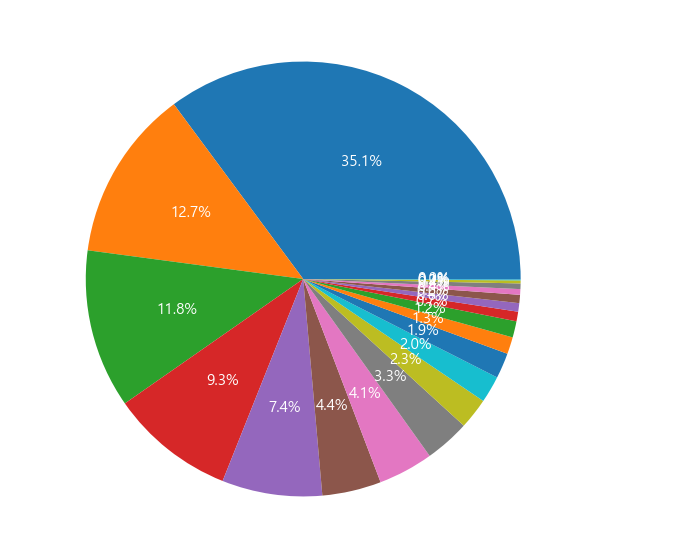

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
plt.pie(youtube_pivot_df['subscriber_sum'], labels=youtube_pivot_df['category'], autopct = '%1.1f%%',textprops={'color' : 'w','fontsize' : 15})
plt.show()

##### 카테고리별 크리에이터 수 시각화 

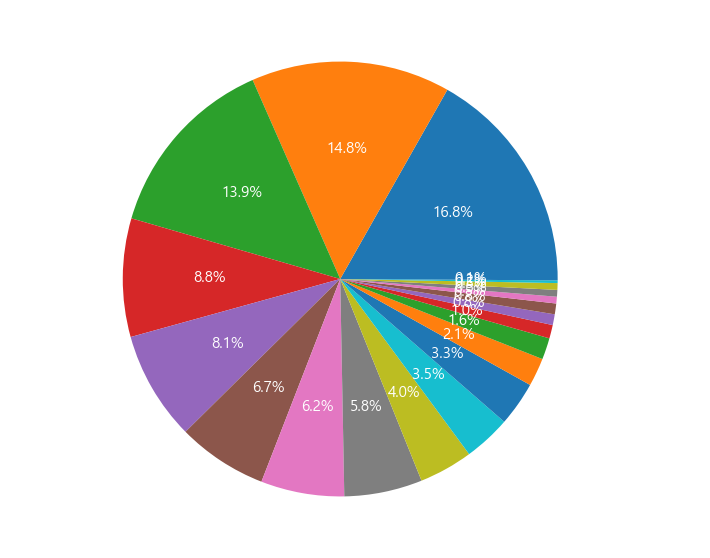

In [181]:
youtube_pivot_df = youtube_pivot_df.sort_values('category_count', ascending=False)
youtube_pivot_df.head()
plt.figure(figsize=(30, 10))
plt.pie(youtube_pivot_df['category_count'], labels = youtube_pivot_df['category'], autopct='%1.1f%%',textprops={'color' : 'w','fontsize' : 15})
plt.show()